## Multiple Linear Regression on Fitbit Data

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Importing the dataset

Dataset is available at https://github.com/knitdata/minrblog/blob/master/content/post/eda/fitbit.csv . I am using activitities columns to predict calories burned. 

In [ ]:
fit_bit = pd.read_csv('fitbit.csv')
fit_bit = fit_bit[['Calories_Burned',	'Steps',	'Minutes_Sedentary',	'Minutes_Lightly_Active',	'Minutes_Fairly_Active',	'Minutes_Very_Active', 'Activity_Calories']]


In [ ]:
fit_bit = fit_bit.dropna()
fit_bit['Steps']=fit_bit['Steps'].apply(lambda x: x.replace(',', '')).astype('float') 
fit_bit['Minutes_Sedentary']=fit_bit['Minutes_Sedentary'].apply(lambda x: x.replace(',', '')).astype('float') 
fit_bit['Calories_Burned']=fit_bit['Calories_Burned'].apply(lambda x: x.replace(',', '')).astype('float') 
fit_bit['Activity_Calories']=fit_bit['Activity_Calories'].apply(lambda x: x.replace(',', '')).astype('float')

In [ ]:
X = fit_bit[['Steps',	'Minutes_Sedentary',	'Minutes_Lightly_Active',	'Minutes_Fairly_Active',	'Minutes_Very_Active']]
y = fit_bit[['Calories_Burned']]

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Training the  Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate class to create object 
regressor.fit(X_train, y_train) # train regression model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor.intercept_)

[1872.46166302]


In [ ]:
regressor.coef_

array([[ 0.04748125, -0.05115503,  1.36915693,  2.87010148,  2.24467801]])

**Calories_Burned = 1872.46 + 0.48(Steps) -0.05(Minutes_Sedentary) + 1.36(Minutes_Lightly_Active) + 2.87(Minutes_Fairly_Active) + 2.24(Minutes_Very_Active)**

## Predicting the Test set results

Text(0, 0.5, 'Predicted Values')

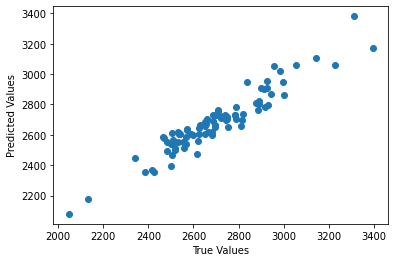

In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

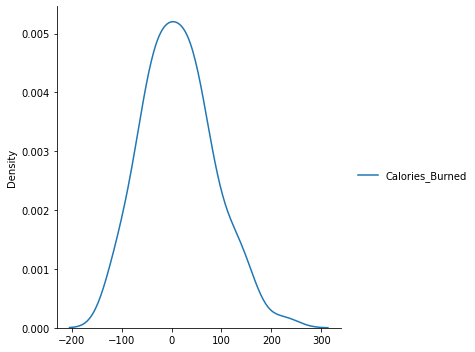

In [ ]:
sns.displot((y_test-y_pred), kind = 'kde') # residuals

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE',metrics.mean_squared_error(y_test, y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('RSQ', metrics.explained_variance_score(y_test, y_pred))


MAE 56.61601124164372
MSE 5104.160637224747
RMSE 71.44340863386032
RSQ 0.8994620456116463
